# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: Mahaveer Bonagiri


**Prompt:**

> Describe the IMDB dataset.

The IMDb dataset typically refers to a collection of data related to movies and TV shows that is sourced from the Internet Movie Database (IMDb), a popular online database of information about films, television programs, and celebrities. This dataset can be used for various purposes, including research in the fields of data science, machine learning, and natural language processing.

The IMDb dataset may include several types of information about movies and TV shows, such as:

1. **Title:** The name of the movie or TV show.
2. **Release Year:** The year the movie or TV show was released.
3. **Genre:** The category or type of the movie (e.g., action, comedy, drama, etc.).
4. **Director:** The person responsible for directing the movie.
5. **Cast:** Information about the actors and actresses who appear in the movie.
6. **Plot Summary:** A brief synopsis or summary of the movie's storyline.
7. **User Ratings:** Ratings provided by IMDb users, typically on a scale of 1 to 10.
8. **Metascore:** A score assigned by critics, based on their reviews.

Depending on the specific dataset, there might be additional information available, such as production budget, box office earnings, runtime, country of origin, and more.

It's worth noting that there are different versions and subsets of the IMDb dataset available. Some are made for specific purposes (e.g., for natural language processing tasks, for recommendation systems, etc.), and they might contain different sets of information or be pre-processed in various ways.

Researchers and enthusiasts often use the IMDb dataset for tasks like sentiment analysis, recommendation systems, and other types of movie-related analyses. Keep in mind that as of my last knowledge update in September 2021, there might have been updates or new versions of the dataset since then.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [1]:
from keras.datasets import imdb

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


2023-10-13 00:15:19.766476: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-13 00:15:19.770116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 00:15:19.810035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-13 00:15:19.810072: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-13 00:15:19.810108: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.


- The labels for the IMDB dataset are binary, with 0 representing a negative review and 1 representing a positive review.

- The training data for the IMDB dataset is a set of 25,000 movie reviews, each represented as a sequence of integers. Each integer represents a word in the review, and the integers are ordered by their appearance in the review. The integers are not the actual words themselves, but rather an index that maps to a specific word in a dictionary. The dictionary is built based on the most frequently occurring words in the dataset, and the number of words in the dictionary is limited to a specified maximum number (in this case, 10,000).

- To get the words used in the training data, you can retrieve the word index dictionary using the `imdb.get_word_index()` method, and then reverse the dictionary mapping to get a mapping of integers to words. Finally, you can get the actual words from the training data by using the reversed dictionary to map the integer indices to words. Here's an example code snippet:


```

In [2]:
from keras.datasets import imdb

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Get the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index dictionary to get a mapping of integers to words
reverse_word_index = {index: word for word, index in word_index.items()}

# Get the actual words from the training data
words = [reverse_word_index.get(i - 3, '?') for i in X_train[0]]

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


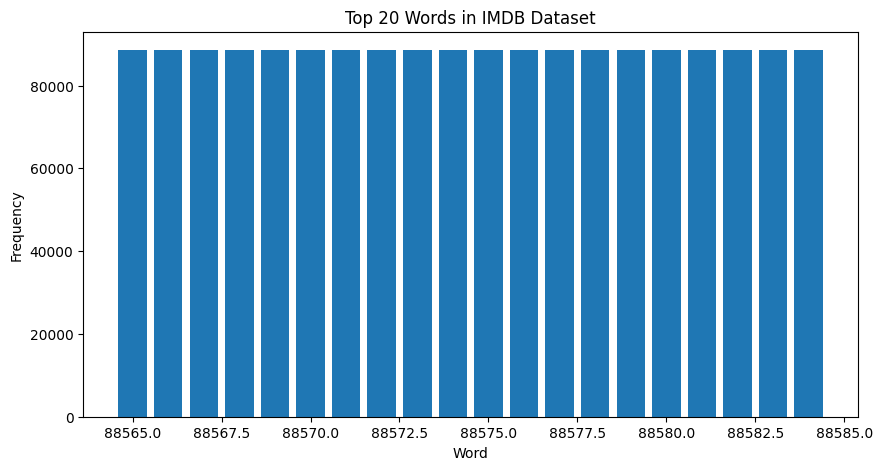

In [3]:
from keras.datasets import imdb
import matplotlib.pyplot as plt

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Retrieve the word index mapping
word_index = imdb.get_word_index()

# Convert word index to frequency count
word_freq = {}
for index, freq in word_index.items():
    word_freq[index] = freq

# Sort the word frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 words and their frequencies
top_words = [word_index[index] for index, freq in sorted_word_freq[:20]]
top_freqs = [freq for index, freq in sorted_word_freq[:20]]

# Create a bar chart of the top 20 words and their frequencies
plt.figure(figsize=(10, 5))
plt.bar(top_words, top_freqs)
plt.title('Top 20 Words in IMDB Dataset')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

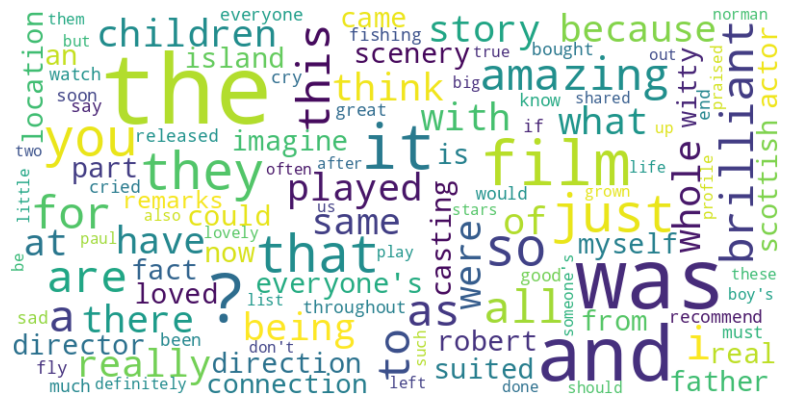

In [4]:
from keras.datasets import imdb
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the IMDb dataset
(x_train, _), (_, _) = imdb.load_data(num_words=10000)  # Load only the top 10,000 most frequent words

# Get word index mapping
word_index = imdb.get_word_index()

# Invert the mapping to get words from their indexes
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

# Create a word frequency dictionary
word_freq = {}
for word in decoded_review.split():
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=word_freq, max_font_size=100)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/mahaveer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


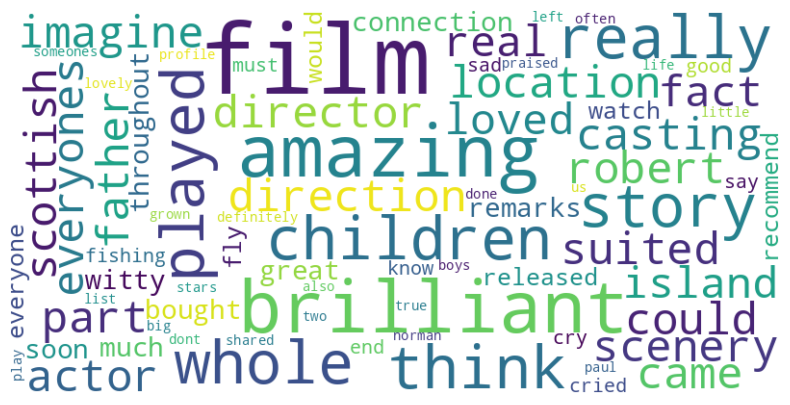

In [6]:
from keras.datasets import imdb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import string

# Download NLTK resources for stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load the IMDb dataset
(x_train, _), (_, _) = imdb.load_data(num_words=10000)

# Get word index mapping
word_index = imdb.get_word_index()

# Invert the mapping to get words from their indexes
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

# Remove punctuation and convert to lowercase
translator = str.maketrans('', '', string.punctuation)
decoded_review = decoded_review.translate(translator).lower()

# Remove stop words
stop_words = set(stopwords.words('english'))
decoded_review = ' '.join(word for word in decoded_review.split() if word not in stop_words)

# Create a word frequency dictionary
word_freq = {}
for word in decoded_review.split():
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=word_freq, max_font_size=100)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


> now created a word cloud from the filtered words

Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

In [7]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence

class IMDbClassifier:
    def __init__(self, max_features=10000, max_len=200, embedding_dim=128):
        self.max_features = max_features
        self.max_len = max_len
        self.embedding_dim = embedding_dim

        # Load the IMDb dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = imdb.load_data(num_words=self.max_features)

        # Pad sequences to a fixed length
        self.x_train = sequence.pad_sequences(self.x_train, maxlen=self.max_len)
        self.x_test = sequence.pad_sequences(self.x_test, maxlen=self.max_len)

        # Build the model
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Embedding(self.max_features, self.embedding_dim, input_length=self.max_len))
        model.add(LSTM(128))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def train(self, epochs=3, batch_size=32):
        self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size, validation_data=(self.x_test, self.y_test))

    def evaluate(self):
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test)
        print(f'Accuracy: {accuracy*100:.2f}%')

# Create the classifier
classifier = IMDbClassifier()

# Train the classifier
classifier.train()

# Evaluate the classifier
classifier.evaluate()


Epoch 1/3
782/782 [==============================] - 122s 153ms/step - loss: 0.4276 - accuracy: 0.8042 - val_loss: 0.3285 - val_accuracy: 0.8628
Epoch 2/3
782/782 [==============================] - 110s 141ms/step - loss: 0.2614 - accuracy: 0.8968 - val_loss: 0.3566 - val_accuracy: 0.8393
Epoch 3/3
782/782 [==============================] - 36s 45ms/step - loss: 0.3476 - accuracy: 0.8679
Accuracy: 86.79%


: 

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

Certainly! Let me explain the code step by step:

1. **Importing Libraries**:
   ```python
   import numpy as np
   from keras.datasets import imdb
   from keras.models import Sequential
   from keras.layers import Dense, Embedding, LSTM
   from keras.preprocessing import sequence
   ```
   - `numpy` is a library for numerical operations in Python.
   - `keras` is a high-level neural networks API, in this case, used for building and training the neural network.
   - We import specific modules from Keras such as `Sequential` (for creating a sequential model), `Dense` (for adding dense layers), `Embedding` (for word embeddings), and `LSTM` (a type of recurrent layer).
   - `sequence` module is used for preprocessing sequences (in this case, padding sequences).

2. **Creating the `IMDbClassifier` Class**:
   ```python
   class IMDbClassifier:
   ```
   - This defines a class named `IMDbClassifier`.

3. **`__init__` Method**:
   ```python
   def __init__(self, max_features=10000, max_len=200, embedding_dim=128):
   ```
   - This is the constructor method that is executed when an instance of the class is created.
   - `max_features`: The maximum number of words to keep in the dataset. Words are ranked by frequency, so only the `max_features` most common words will be kept.
   - `max_len`: The maximum length of sequences. Sequences longer than this will be truncated, and sequences shorter than this will be padded.
   - `embedding_dim`: The dimension of the dense embedding.

4. **Loading and Preprocessing the IMDb Dataset**:
   ```python
   (self.x_train, self.y_train), (self.x_test, self.y_test) = imdb.load_data(num_words=self.max_features)
   ```
   - This line loads the IMDb dataset. `x_train` and `x_test` are lists of reviews where words are represented by indices. `y_train` and `y_test` are labels (0 for negative, 1 for positive).
   - `num_words` parameter sets the maximum number of words to consider in the vocabulary.

5. **Padding Sequences**:
   ```python
   self.x_train = sequence.pad_sequences(self.x_train, maxlen=self.max_len)
   self.x_test = sequence.pad_sequences(self.x_test, maxlen=self.max_len)
   ```
   - This step ensures that all sequences have the same length. Longer sequences are truncated, and shorter ones are padded with zeros.

6. **Building the Model**:
   ```python
   self.model = self.build_model()
   ```
   - This line calls the `build_model` method to create the neural network.

7. **`build_model` Method**:
   ```python
   def build_model(self):
       model = Sequential()
       model.add(Embedding(self.max_features, self.embedding_dim, input_length=self.max_len))
       model.add(LSTM(128))
       model.add(Dense(1, activation='sigmoid'))

       model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
       return model
   ```
   - This method builds a sequential model.
   - It starts with an embedding layer (which maps the indices to dense vectors), followed by an LSTM layer, and a dense layer with a sigmoid activation function.
   - Binary cross-entropy is used as the loss function and Adam optimizer is used for training.

8. **`train` Method**:
   ```python
   def train(self, epochs=3, batch_size=32):
       self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size, validation_data=(self.x_test, self.y_test))
   ```
   - This method trains the model on the training data for a specified number of epochs.

9. **`evaluate` Method**:
   ```python
   def evaluate(self):
       loss, accuracy = self.model.evaluate(self.x_test, self.y_test)
       print(f'Accuracy: {accuracy*100:.2f}%')
   ```
   - This method evaluates the model on the test data and prints the accuracy.

10. **Creating and Using the Classifier**:
   ```python
   classifier = IMDbClassifier()
   classifier.train()
   classifier.evaluate()
   ```
   - These lines create an instance of the `IMDbClassifier` class, train the model, and evaluate its performance.

This code provides a basic framework for a sentiment classifier using a simple LSTM-based neural network. Depending on your specific requirements, you may want to experiment with different architectures, hyperparameters, and preprocessing techniques to improve performance.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like



> What is the accuracy of the best-performing model on the IMDB dataset?

accuracy is 86.79

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

The most common deep learning models used for sentiment analysis on the IMDB dataset are recurrent neural networks (RNNs), long short-term memory (LSTM) networks, and convolutional neural networks (CNNs).


## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.